<a href="https://colab.research.google.com/github/vlad-danaila/machine-learning-workout/blob/master/Exercise_5_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**

In [174]:
!pip3 install torch torchvision

In [0]:
import numpy as np
import torch as t
import sklearn as sk
import sklearn.datasets
import matplotlib.pyplot as plt
import sklearn.model_selection

Data loading

In [0]:
x, y = sk.datasets.make_blobs(n_samples = 1000, n_features = 2, centers = [[-1, 1], [-0.5, -1]], cluster_std = (1, 2))

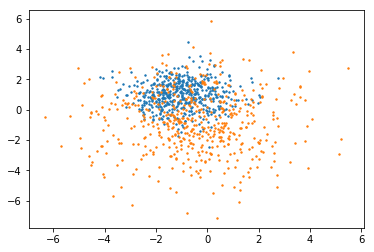

In [222]:
def plot_blobs():
  plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 2)
  plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 2)
  
plot_blobs()

In [0]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size = 0.4)

In [0]:
class PointsSet(t.utils.data.Dataset):
  def __init__(self, x, y):
    self.x = x.astype(np.float32)
    self.y = y.astype(np.float32)
    self.len = len(y)
  
  def __getitem__(self, i):
    return self.x[i], self.y[i]  
  
  def __len__(self):
    return self.len

In [0]:
loader_train = t.utils.data.DataLoader(PointsSet(x_train, y_train), batch_size = 100, shuffle = True)
loader_test = t.utils.data.DataLoader(PointsSet(x_test, y_test), batch_size = 100, shuffle = True)

Define model

In [0]:
class Logistic(t.nn.Module):
  
  def __init__(self):
    super().__init__()
    self.linear = t.nn.Linear(2, 1)
    
  def forward(self, x):
    return t.sigmoid(self.linear(x))

Train Model

In [0]:
def accuracy(y_pred, y):
  return t.sum(t.tensor(y_pred > .5, dtype = t.float32) == y).item() / len(y)

In [228]:
epochs = 7000
model = Logistic()
optimizer = t.optim.SGD(model.parameters(), lr = 0.0001)
loss_fn = t.nn.BCELoss()
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(epochs):
  # Train
  epoch_train_loss = 0
  epoch_train_accuracy = 0
  for x, y in loader_train:
    y_pred = model.forward(x)
    y_pred = y_pred.squeeze(1)
    epoch_train_accuracy += accuracy(y_pred, y)
    loss = loss_fn(y_pred, y)
    epoch_train_loss += loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  epoch_train_loss /= len(loader_train)
  epoch_train_accuracy /= len(loader_train)
  train_losses.append(epoch_train_loss)
  train_accuracies.append(epoch_train_accuracy)
  
  # Test
  with t.no_grad():
    epoch_test_loss = 0
    epoch_test_accuracy = 0
    for x, y in loader_test:
      y_pred = model.forward(x)
      y_pred = y_pred.squeeze(1)
      epoch_test_accuracy += accuracy(y_pred, y)
      loss = loss_fn(y_pred, y)
      epoch_test_loss += loss
    epoch_test_loss /= len(loader_test)
    epoch_test_accuracy /= len(loader_test)
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_accuracy)
  
  print('Epoch {} loss {} accuracy {}'.format(epoch + 1, epoch_train_loss, epoch_train_accuracy))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Epoch 1 loss 1.2195498943328857 accuracy 0.27666666666666667
Epoch 2 loss 1.2190910577774048 accuracy 0.27666666666666667
Epoch 3 loss 1.2186330556869507 accuracy 0.27666666666666667
Epoch 4 loss 1.2181740999221802 accuracy 0.27666666666666667
Epoch 5 loss 1.2177170515060425 accuracy 0.27666666666666667
Epoch 6 loss 1.2172589302062988 accuracy 0.27666666666666667
Epoch 7 loss 1.2168008089065552 accuracy 0.27666666666666667
Epoch 8 loss 1.2163432836532593 accuracy 0.27666666666666667
Epoch 9 loss 1.2158855199813843 accuracy 0.27666666666666667
Epoch 10 loss 1.215429425239563 accuracy 0.27666666666666667
Epoch 11 loss 1.2149720191955566 accuracy 0.27666666666666667
Epoch 12 loss 1.2145155668258667 accuracy 0.27666666666666667
Epoch 13 loss 1.2140603065490723 accuracy 0.27666666666666667
Epoch 14 loss 1.2136039733886719 accuracy 0.27666666666666667
Epoch 15 loss 1.2131471633911133 accuracy 0.27666666666666667
Epoch 16 loss 1.212692379951477 accuracy 0.27666666666666667
Epoch 17 loss 1.212

Display results

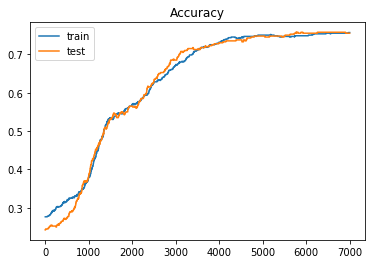

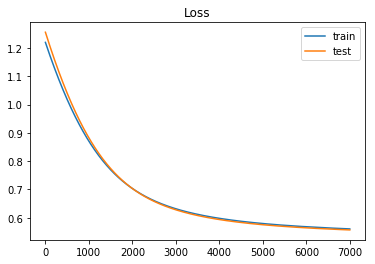

In [229]:
plt.plot(range(len(train_accuracies)), train_accuracies, label = 'train')
plt.plot(range(len(test_accuracies)), test_accuracies, label = 'test')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(range(len(train_losses)), train_losses, label = 'train')
plt.plot(range(len(test_losses)), test_losses, label = 'test')
plt.legend()
plt.title('Loss')
plt.show()

In [0]:
def x_space(x, steps = 1000):
  x_min, x_max = min(x), max(x)
  diff = x_max - x_min
  padd = diff / 10
  return np.linspace(x_min - padd, x_max + padd, steps)

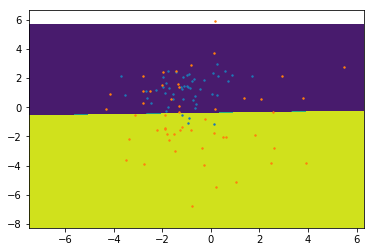

In [231]:
x0, x1 = x_space(x_train[:, 0]), x_space(x_train[:, 1])
mesh_x0, mesh_x1 = np.meshgrid(x0, x1)
x01 = np.c_[mesh_x0.ravel(), mesh_x1.ravel()]
x01_tensor = t.tensor(x01, dtype = t.float32)
y_grid = model.forward(x01_tensor)

plt.contourf(x0, x1, y_grid.detach().numpy().reshape(mesh_x0.shape) > .5)
plot_blobs()

In [232]:
y_grid.shape

torch.Size([1000000, 1])